https://doi.org/10.14989/doctor.k18283
parameters I used: page 43


| Layer    | Thickness ($\mu m$) | Dielectric constant |
| :----: | :----: | :----: |
|n-clad(AlGaAs)| 1.5| 11.0224|
|Active| 0.0885 |12.8603|
|PC |0.1180 |$\epsilon_{av}$ |
|GaAs |0.0590 |12.7449|
|p-clad(AlGaAs) |1.5 |11.0224|

$$ \epsilon_{av} = FF \cdot \epsilon_a + (1-FF) \cdot \epsilon_b$$
$FF=0.16$, $D=10$, $\epsilon_a=1.0$, $\epsilon_b=12.7449$, $a=295nm$.


# Result 1: Coupling coefficients (Fourier coefficients)

d:\Documents\GitHub\3D-CWT\model\_Model.py:94: RuntimeWarning: divide by zero encountered in divide
  coeff_s = self.gamma_s[:-1]/self.gamma_s[1:]
d:\Documents\GitHub\3D-CWT\model\_Model.py:94: RuntimeWarning: invalid value encountered in divide
  coeff_s = self.gamma_s[:-1]/self.gamma_s[1:]
d:\Documents\GitHub\3D-CWT\model\_Model.py:163: RuntimeWarning: overflow encountered in exp
  e_amp = V_0*np.exp(self.gamma_s[i]*(z-z_b))+V_1*np.exp(-self.gamma_s[i]*(z-z_b))
d:\Documents\GitHub\3D-CWT\model\_Model.py:163: RuntimeWarning: invalid value encountered in multiply
  e_amp = V_0*np.exp(self.gamma_s[i]*(z-z_b))+V_1*np.exp(-self.gamma_s[i]*(z-z_b))


a: 0.2788720840684447 um
The model parameters is saved in ./history_res/c920fd1be9d84c52be13323b77ae36a9/input_para.npy.


c:\Users\these\.conda\envs\MPh\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\these\.conda\envs\MPh\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


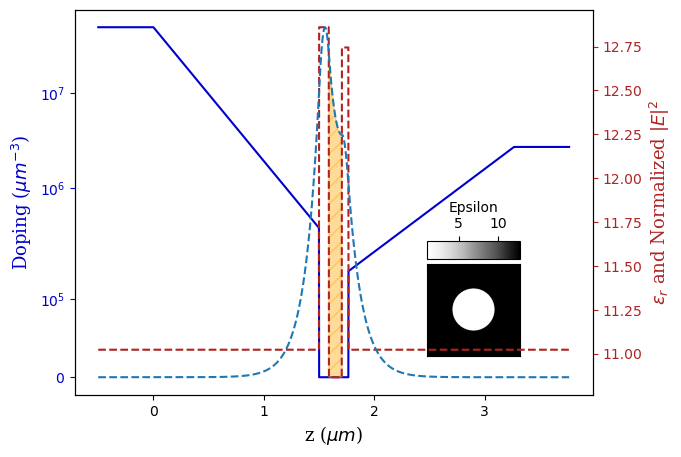

In [4]:
import model
import model.rect_lattice
import numpy as np
import matplotlib.pyplot as plt
from model import user_defined_material

def plot_model(input_model:model.Model):
    z_mesh = np.linspace(input_model.tmm.z_boundary[0]-0.5, input_model.tmm.z_boundary[-1]+0.5, 5000)
    E_profile_s = input_model.e_normlized_intensity(z=z_mesh)
    dopings = input_model.doping(z=z_mesh)
    eps_s = input_model.eps_profile(z=z_mesh)
    E_profile_s = E_profile_s / np.max(np.abs(E_profile_s)) * (np.max(np.abs(input_model.paras.avg_epsilons)) - np.min(np.abs(input_model.paras.avg_epsilons))) + np.min(np.abs(input_model.paras.avg_epsilons))
    a_const = input_model.paras.cellsize_x
    x_mesh = np.linspace(0, a_const, 500)
    y_mesh = np.linspace(0, a_const, 500)
    z_points = np.array([(input_model.phc_boundary_l[-1]+input_model.phc_boundary_r[-1])/2,]) # must be a vector
    XX, YY = np.meshgrid(x_mesh, y_mesh)
    eps_mesh_phc = input_model.eps_profile(XX, YY, z_points)[0]

    color1, color2, fontsize1, fontsize2, fontname = 'mediumblue', 'firebrick', 13, 18, 'serif'
    fig, ax0 = plt.subplots(figsize=(7,5))
    fig.subplots_adjust(left=0.12, right=0.86)
    ax1 = plt.twinx()
    ax0.plot(z_mesh, dopings, color=color1)
    ax0.tick_params(axis='y', colors=color1, labelsize=10)
    ax1.plot(z_mesh, eps_s, linestyle='--', color=color2)
    ax1.plot(z_mesh, E_profile_s, linestyle='--')
    ax1.fill_between(z_mesh, np.min(E_profile_s), E_profile_s, where=input_model.is_in_phc(z_mesh), alpha=0.4, hatch='//', color='orange')
    ax1.tick_params(axis='y', colors=color2, labelsize=10)
    ax0.set_xlabel(r'z ($\mu m$)', fontsize=fontsize1, fontname=fontname)
    ax0.set_ylabel(r'Doping ($\mu m^{-3}$)', fontsize=fontsize1, fontname=fontname, color=color1)
    ax0.set_yscale('symlog', linthresh=np.min(dopings[dopings!=0.0]))
    ax1.set_ylabel(r'$\epsilon_r$ and Normalized $|E|^2$', fontsize=fontsize1, fontname=fontname, color=color2)
    plt.title('', fontsize=fontsize2, fontname=fontname)

    ax2 = ax0.inset_axes([0.65, 0.10, 0.24, 0.24])
    im = ax2.imshow(np.real(eps_mesh_phc), cmap='Greys')
    ax2.set_xticks([])
    ax2.set_yticks([])
    cb = fig.colorbar(im, cax=ax2.inset_axes([0, 1.05, 1, 0.2]), orientation='horizontal', label='Epsilon')
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
    plt.show()
    plt.close()

FF = 0.16
rel_r = np.sqrt(FF/np.pi)
eps_list = [11.0224, 12.8603, 12.7449, 12.7449, 11.0224]
t_list = [1.5, 0.0885, 0.1180, 0.0590, 1.5]
is_phc = [False, False, True, False, False]
is_no_doping = [False, True, True, True, False]
mat_list = []
for i in range(len(is_phc)):
    if is_phc[i]:
        mat_list.append(model.rect_lattice.eps_circle(rel_r, user_defined_material(eps_list[i])))
    else:
        mat_list.append(user_defined_material(eps_list[i]))
doping_para = {'is_no_doping':is_no_doping,'coeff':[17.7, -3.23, 8.28, 2.00]}
paras = model.model_parameters((t_list, mat_list, doping_para), k0=2*np.pi/0.94) # input tuple (t_list, eps_list, index where is the active layer)
pcsel_model = model.Model(paras)
plot_model(pcsel_model)
cwt_solver = model.CWT_solver(pcsel_model)

xi: (3, 3)    

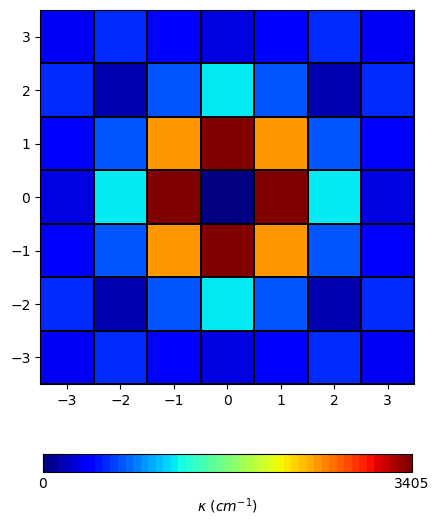

In [5]:
xi_calculator = cwt_solver.xi_calculator_collect[2]
m_mesh = np.arange(-3, 4)
n_mesh = np.arange(-3, 4)
MM, NN = np.meshgrid(m_mesh, n_mesh)
ZZ = np.zeros_like(MM, dtype=np.complex128)
for i in range(len(m_mesh)):
    for j in range(len(n_mesh)):
        ZZ[i,j] = xi_calculator((m_mesh[i], n_mesh[j]))
        if m_mesh[i] == 0 and n_mesh[j] == 0:
            ZZ[i,j] = 0.0
ZZ = ZZ*cwt_solver.model.gamma_phc*cwt_solver.model.k0/(2*np.sqrt(xi_calculator[0,0]))*1e4 # cm^-1
fig, ax = plt.subplots(figsize=(5,6))
cmap = plt.get_cmap('jet', 49)
im = ax.pcolormesh(MM, NN, np.abs(ZZ), shading='auto', cmap=cmap, edgecolors='black', linewidth=0.01)
ax.set_aspect('equal')
cb = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.04)
cb.ax.tick_params(direction='in', length=3)
cb.ax.xaxis.set_ticks_position('both')
cb.set_ticks([np.min(np.abs(ZZ)), np.max(np.abs(ZZ))])
cb.set_label(r'$\kappa\ (cm^{-1})$')
plt.show()

In [9]:
4%2

yes
